# Linear and Logistic Regression

In this notebook, we'll outline the basic ideas of Supervised Learning through defining the simplest model in both Regression and Classification. First, let's build some datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

plt.style.use("fivethirtyeight") 

In [2]:
df_regression = pd.DataFrame({"x":[1,2,2,3,4,4,5,5], "y":[1,1,3,2,3,4,4,5]})
df_classification = pd.DataFrame({"x":[1,2,3,3,4,4,5,5.5], "y":[0,0,0,1,0,1,1,1]})

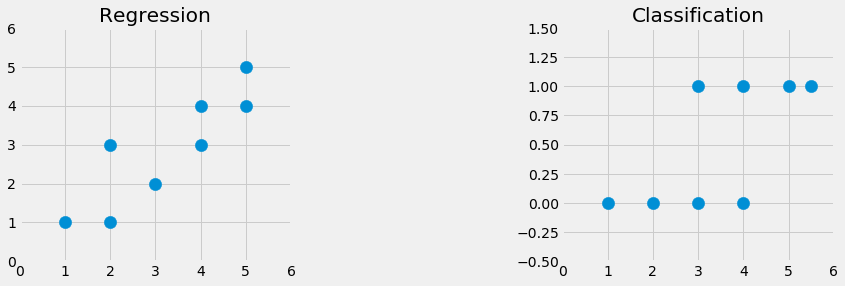

In [3]:
def graph_plots():
    fig, ax = plt.subplots(1, 2, figsize=(13, 4))
    fig.subplots_adjust(wspace=1)
    
    ax[0].scatter(df_regression.x, df_regression.y, s=150)
    ax[0].set_title("Regression")
    ax[0].set_xlim([0,6])
    ax[0].set_ylim([0,6])
    ax[1].scatter(df_classification.x, df_classification.y, s=150)
    ax[1].set_title("Classification")
    ax[1].set_xlim([0,6])
    ax[1].set_ylim([-0.5, 1.5])
    return fig, ax

graph_plots()
plt.show()

In order to create functions for these datasets, we perform **Linear Regression** for the Regression dataset and **Logistic Regression** for the Classification datset.  In both functions, we use $x_i$ and $y_i$ for the contents of the $i^\text{th}$ row, and $\widehat{y}_i$ to denote our prediction for the $i^\text{th}$ response.

### Linear Regression
Here, we choose to fit the function

$$\widehat{y} = m \cdot x + b$$

So, for the $i^\text{th}$ variable, to make our prediction, we use $\widehat{y}_i = m \cdot x_i + b$.  Here $m$ and $b$ are called **parameters** of the function; they determine how our line fits our data.

### Logistic Regression
Here, we choose to fit the function

$$\widehat{y} = \dfrac{1}{1+e^{-(m \cdot x + b)}}$$

So, for the $i^\text{th}$ variable, to make our prediction, we use the appropriately rounded version of $\widehat{y}_i = \dfrac{1}{1+e^{-(m \cdot x_i + b)}}$.  Note that the values of this function are between 0 and 1, inclusive.  Thus, we interpret these values as the _probability_ that a value would be a one, and typically choose a cut off point (often, but not necessarily 50%) to round the values to 0 or 1.

## Cost functions
In order to fit these functions, we need to choose an appropriate parameters $m$ and $b$.  Here are two curves drawn for each function, with different qualities of fit:

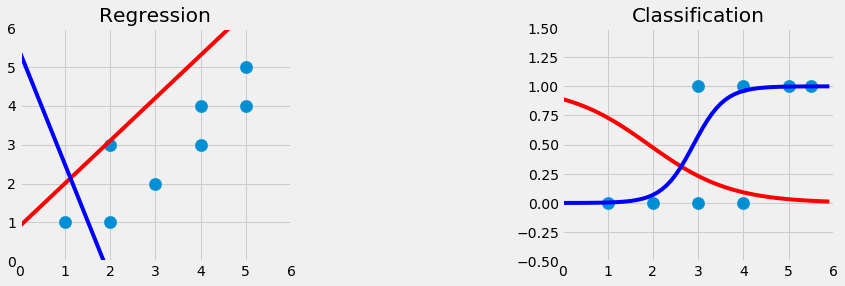

In [26]:
# Let's try some random values for `m` and `b`:
m_1, b_1 = 1.1, 0.9
m_2, b_2 = -2.9, 5.4

x = np.arange(0, 6, .1)
y_1_reg = m_1 * x + b_1
y_2_reg = m_2 * x + b_2

# Need to tweak the b's for demonstration purposes
y_1_cla = 1 - 1 / (1 + np.exp(-(m_1 * x + (b_1 - 3))))
y_2_cla = 1 - 1 / (1 + np.exp(-(m_2 * x + (b_2 + 3))))

fig, ax = graph_plots() 
ax[0].plot(x, y_1_reg, color="red")
ax[0].plot(x, y_2_reg, color="blue")
ax[1].plot(x, y_1_cla, color="red")
ax[1].plot(x, y_2_cla, color="blue")
plt.show()

In the Regression example, it appears that the red line is an OK fit, and the blue line is bad.  In the Classification example, it appears that the blue line is an OK fit, and the red line is bad.  In order to choose the best $m$ and $b$, we define a **cost function** for both of these models.  One key point about cost functions is that **they are functions of the parameters of the model function**.

### Regression: Residual Sum of Squares
Given a dataset $(x, y)$ with $n$ rows, we define the cost function of a regression equation to be: 
$$C(m, b) = \sum_{i=1}^n (y_i - \widehat{y}_i)^2$$
Note that there is _one term in this sum for each row in the dataset_.  This is the sum of the squares of  **residual** terms:

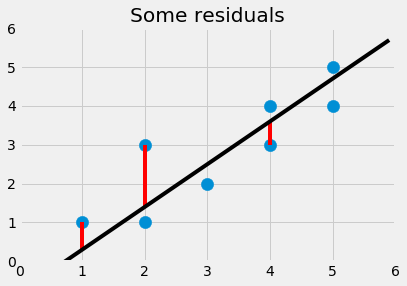

In [27]:
m, b = 1.1, -0.8

y = m * x + b
for xi, yi in [(2, 3), (1, 1), (4, 3)]:
    plt.plot([xi, xi], [yi, m * xi + b], 'r')
plt.plot(x, y, 'k')   
plt.scatter(df_regression.x, df_regression.y, s=150)
plt.title("Some residuals")
plt.xlim([0,6])
plt.ylim([0,6])
plt.show()

In order to make sure we fully understand how the cost function is generated, let's write it all the way out for our dataset:

$$
\begin{align}
C(m, b) &= \sum_{i=1}^n (y_i - \widehat{y}_i)^2\\
&= \sum_{i=1}^n (y_i - (m \cdot x_i + b))^2\\
&= (1 - (m \cdot 1 + b))^2 + (1 - (m \cdot 2 + b))^2 + (3 - (m \cdot 2 + b))^2 + (2 - (m \cdot 3 + b))^2 + (3 - (m \cdot 4 + b))^2 \\ &\ldots + (4 - (m \cdot 4 + b))^2 + (4 - (m \cdot 5 + b))^2 + (5 - (m \cdot 5 + b))^2.\\
\end{align}
$$
It's a bit of a mess, but notice that the cost function's form is dependent on the dataset.

### Classification: Cross-entropy
Given a dataset $(x, y)$ with $n$ rows, we define the cost function of a classification equation to be: 
$$C(m, b) = -\sum_{i=1}^n y_i \ln(\widehat{y}_i) + (1 - y_i) \ln (1 - \widehat{y}_i)$$
A very important note is that $y_i$ is either 0 or 1, so again there will only ever be one term in the sum for each row in the dataset.  The intuition here is that the $y_i$ and $1-y_i$ terms select the appropriate choice of cost function, where the logarithm function measures a value close to 0 inside of it as bad, and a value close to 1 inside of it to be good.
![cross_entropy](cross_entropy.png)
The reader is encouraged to expand the cost function all the way out for the given dataset.
## Fitting: Gradient Descent
One key aspect of these cost functions is that they are differentiable, as in, we may take their derivative.  If they were nice functions, one could simply perform some standard calculus optimization technique.  After all, to best fit the model's function, we need to minimize the cost function, _i.e._ choose an $m$ and $b$ which minimize the function.  In practice, however, these are not nice functions to solve, so we need a better solution. (_Side note_: this is a slight lie.)

In general, we perform the following algorithm:
1. Pick reasonable, random values for $m$ and $b$.
2. Compute the gradient of $C$ at the current $m$ and $b$, denoted by $\nabla C (m, b)=\left< m', b'\right>$.
3. Here, we need a fact from calculus: _the gradient always points straight toward the direction of steepest increase_.  Okay, so to minimize the function, step directly away from the gradient.  If $\alpha$ is a small number, we do:
$$
\begin{align}
m &\mapsto m - \alpha \cdot m' \\
b &\mapsto b - \alpha \cdot b' \\
\end{align}
$$
The number $\alpha$ is often called the _learning rate_ of the algorithm, and taking a default of something like 0.01 usually works well.
4. Return to step 2 until the new gradient is very tiny, so that you aren't going to be making much progress anymore.

In practice, this tends to find a reasonable optimum for our fit.  Understanding the details of this is part of the Gradients Project.  In conclusion, we fit using Scikit-learn's built-in Linear and Logistic Regression functions to fit and graph our curves.

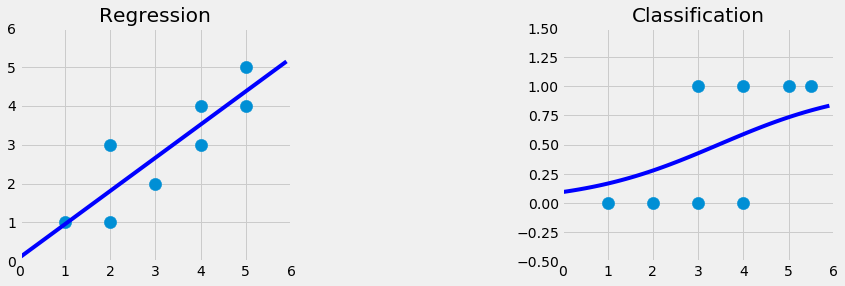

In [25]:
# I found that I got better results from this function if I scaled the data to have mean 0 and standard deviation 1.
def scale_data(x):
    return (x - df_classification.x.mean()) / df_classification.x.std()

lin_model = LinearRegression().fit(df_regression[['x']], df_regression['y'])
log_model = LogisticRegression().fit(scale_data(df_classification[['x']]), df_classification['y'])

m_reg = lin_model.coef_[0]
b_reg = lin_model.intercept_

m_cla = log_model.coef_[0]
b_cla = log_model.intercept_

x = np.arange(0, 6, .1)
y_reg = m_reg * x + b_reg
y_cla = 1 - 1 / (1 + np.exp(m_cla * scale_data(x) + b_cla))

fig, ax = graph_plots() 
ax[0].plot(x, y_reg, color="blue")
ax[1].plot(x, y_cla, color="blue")
plt.show()